# Proyek Analisis Data: Air Quality Dataset
- Nama: Wildan Hanif Musyaffa
- Email: wildanhanif70@gmail.com

## Deskripsi Dataset

Dataset dibagi berdasarkan distrik wilayahnya. Terdapat 12 distrik yaitu Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, dan Wanshouxigong. Berikut penjelasan dari kolom pada dataset.
- ***No***: Ini adalah nomor indeks atau nomor baris dalam dataset. 
- ***year***:  Berisi tahun pengukuran kualitas udara. 
- ***month***: Berisi bulan pengukuran kualitas udara. 
- ***day***:  Berisi tanggal pengukuran kualitas udara. 
- ***hour***: Berisi jam pengukuran kualitas udara. 
- ***PM2.5***: Ini adalah konsentrasi partikulat matter (PM) dengan diameter kurang dari atau sama dengan 2.5 mikrometer dalam udara. 
- ***PM10***: Ini adalah konsentrasi partikulat matter (PM) dengan diameter kurang dari atau sama dengan 10 mikrometer dalam udara. 
- ***SO2***: Ini adalah konsentrasi sulfur dioksida dalam udara. 
- ***NO2***: Ini adalah konsentrasi nitrogen dioksida dalam udara.  
- ***CO***: Ini adalah konsentrasi karbon monoksida dalam udara. 
- ***O3***: Ini adalah konsentrasi ozon dalam udara. 
- ***TEMP***: Ini adalah suhu udara dalam derajat Celsius pada saat pengukuran.
- ***PRES***: Ini adalah tekanan udara dalam hPa (hektopascal) pada saat pengukuran.
- ***DEWP***: Ini adalah titik embun udara dalam derajat Celsius pada saat pengukuran. Titik embun adalah suhu di mana udara jenuh dengan kelembaban, dan embun mulai terbentuk.
- ***RAIN***: Ini adalah jumlah hujan yang jatuh dalam jam yang sesuai dengan pengukuran.
- ***wd***: Ini adalah arah angin (wind direction) pada saat pengukuran.
- ***WSPM***: Ini adalah kecepatan angin (wind speed) dalam meter per detik pada saat pengukuran.
- ***station***: Ini adalah nama atau identifikasi stasiun pengukuran kualitas udara. 

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan rata-rata AQI perbulannya berdasarkan polutan PM2.5 pada Station Changping, Dongsi, dan Huairou?
- Apakah terdapat perbedaan konsentrasi *Nitrogen Dioxide* (NO2) antara stasiun pengukuran di wilayah urban (Dongsi) dan pedesaan (Huairou)?
- Apakah konsentrasi *Carbon Monoxide* (CO) cenderung lebih rendah selama periode hujan di Dongsi?

## Menyaipkan semua library yang dibuthkan

In [1]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
changping_df = pd.read_csv('Data/PRSA_Data_Changping_20130301-20170228.csv')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [3]:
dongsi_df = pd.read_csv('Data/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsi_df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [4]:
huairou_df = pd.read_csv('Data/PRSA_Data_Huairou_20130301-20170228.csv')
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


### Assessing Data

#### Menilai tabel `Changping`

In [5]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Menilai tabel `Dongsi_df`

In [9]:
dongsi_df.info()
print("Jumlah duplikasi", dongsi_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi 0


In [10]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [11]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai tabel `Huairou_df`

In [12]:
huairou_df.info()
print("Jumlah duplikasi", huairou_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi 0


In [13]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [14]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


### Cleaning Data

#### Membersihkan changping_df

#### Missing Values

In [15]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [16]:
cols_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
changping_df[cols_to_interpolate] = changping_df[cols_to_interpolate].interpolate(method='linear')

In [17]:
changping_df['wd'] = changping_df['wd'].fillna(changping_df['wd'].mode()[0])

In [18]:
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan dongsi_df

#### Missing Values

In [19]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [20]:
dongsi_df[cols_to_interpolate] = dongsi_df[cols_to_interpolate].interpolate(method='linear')
dongsi_df['wd'] = dongsi_df['wd'].fillna(changping_df['wd'].mode()[0])

In [21]:
dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan huairou_df

#### Missing Values

In [22]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [23]:
huairou_df[cols_to_interpolate] = huairou_df[cols_to_interpolate].interpolate(method='linear')
huairou_df['wd'] = huairou_df['wd'].fillna(changping_df['wd'].mode()[0])

In [24]:
huairou_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore changping_df

In [25]:
changping_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
17388,17389,2015,2,23,12,19.0,57.0,15.0,9.0,300.0,66.0,5.0,1011.0,-17.4,0.0,SSE,3.3,Changping
17199,17200,2015,2,15,15,306.0,325.0,115.0,134.0,5000.0,25.0,8.0,1009.0,-6.6,0.0,SSE,1.6,Changping
8451,8452,2014,2,16,3,364.0,336.0,93.0,68.0,3550.0,18.0,-3.1,1017.7,-7.6,0.0,NNW,1.2,Changping
13209,13210,2014,9,2,9,24.0,46.0,2.0,64.0,1000.0,5.0,20.0,1002.1,18.5,0.1,W,0.8,Changping
14869,14870,2014,11,10,13,68.0,87.0,18.0,46.0,1200.0,54.0,14.9,1012.0,-5.0,0.0,SSW,1.7,Changping


In [26]:
changping_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060293,NaN,1.854871,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.367457,10.226075,13.828895,0.752357,NaN,1.310748,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.300000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


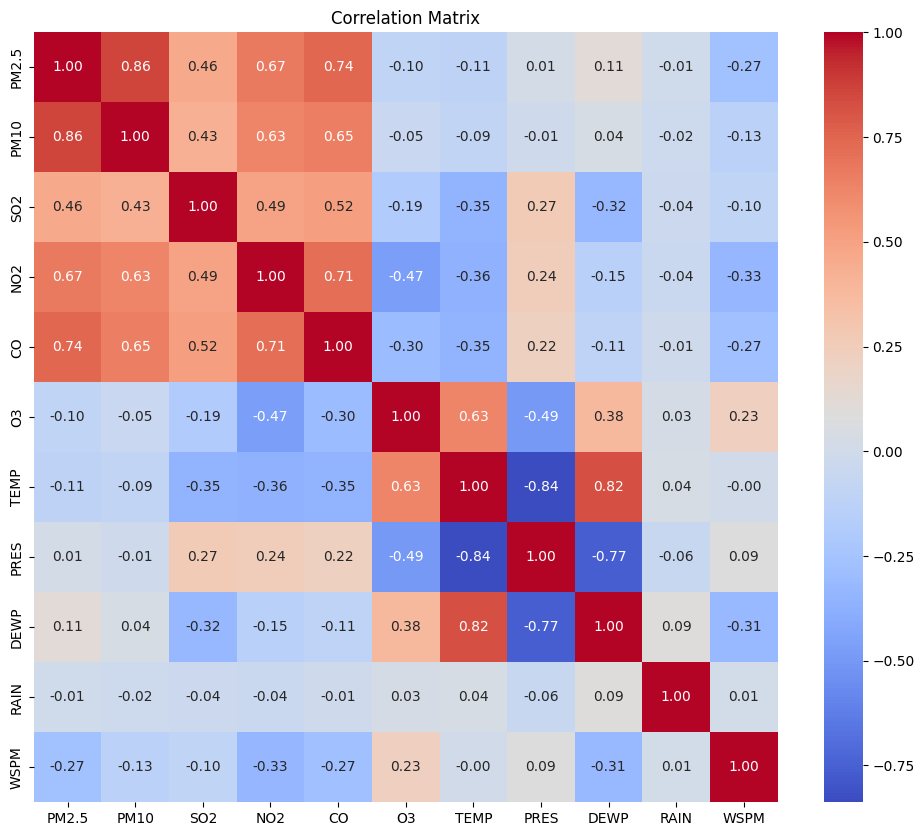

In [27]:
# Correlation Analysis
correlation_matrix = changping_df[cols_to_interpolate].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [28]:
changping_df["O3"].sort_values(ascending=False)

3640     429.0000
12303    413.0000
3641     387.0000
10936    366.0000
11679    365.0000
           ...   
5909       0.4284
2908       0.2142
6385       0.2142
2925       0.2142
5814       0.2142
Name: O3, Length: 35064, dtype: float64

In [29]:
changping_df.groupby(by="O3").No.nunique().sort_values(ascending=False)

O3
2.000000      2278
3.000000       831
4.000000       724
5.000000       587
6.000000       581
              ... 
69.692308        1
70.461538        1
70.538462        1
70.686000        1
429.000000       1
Name: No, Length: 1314, dtype: int64

### Explore dongsi_df

In [30]:
dongsi_df.sample(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
28369,28370,2016,5,26,1,39.0,69.0,2.0,97.0,1000.000000,3.0,19.1,1003.3,8.1,0.0,NNW,1.3,Dongsi
15360,15361,2014,12,1,0,19.0,565.0,2.0,10.0,200.000000,58.0,-5.0,1027.0,-26.4,0.0,NW,6.8,Dongsi
26810,26811,2016,3,22,2,179.0,199.0,38.0,84.0,1400.000000,23.0,11.0,1014.2,1.0,0.0,E,0.8,Dongsi
20331,20332,2015,6,26,3,117.0,117.0,2.0,20.0,800.000000,72.0,20.8,995.7,19.6,9.6,S,0.3,Dongsi
16481,16482,2015,1,16,17,6.0,19.0,10.0,17.0,400.000000,72.0,1.0,1026.0,-17.4,0.0,NW,2.6,Dongsi
12403,12404,2014,7,30,19,169.0,169.0,4.0,41.0,1900.000000,117.0,25.7,1001.8,22.2,0.0,ESE,1.1,Dongsi
6727,6728,2013,12,6,7,152.0,150.0,55.0,59.0,1492.345079,9.0,-2.1,1017.1,-9.7,0.0,ENE,1.3,Dongsi
32856,32857,2016,11,29,0,97.0,159.0,40.0,99.0,2100.000000,2.0,-1.5,1030.0,-6.6,0.0,SW,0.9,Dongsi
8904,8905,2014,3,7,0,67.0,121.0,22.0,63.0,1200.000000,20.0,1.7,1024.9,-11.5,0.0,S,2.0,Dongsi
33807,33808,2017,1,7,15,107.0,107.0,13.0,54.0,2200.000000,178.0,1.9,1019.2,0.4,0.0,ENE,1.1,Dongsi


In [31]:
dongsi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,NaN,1.860815,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,NaN,1.280427,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


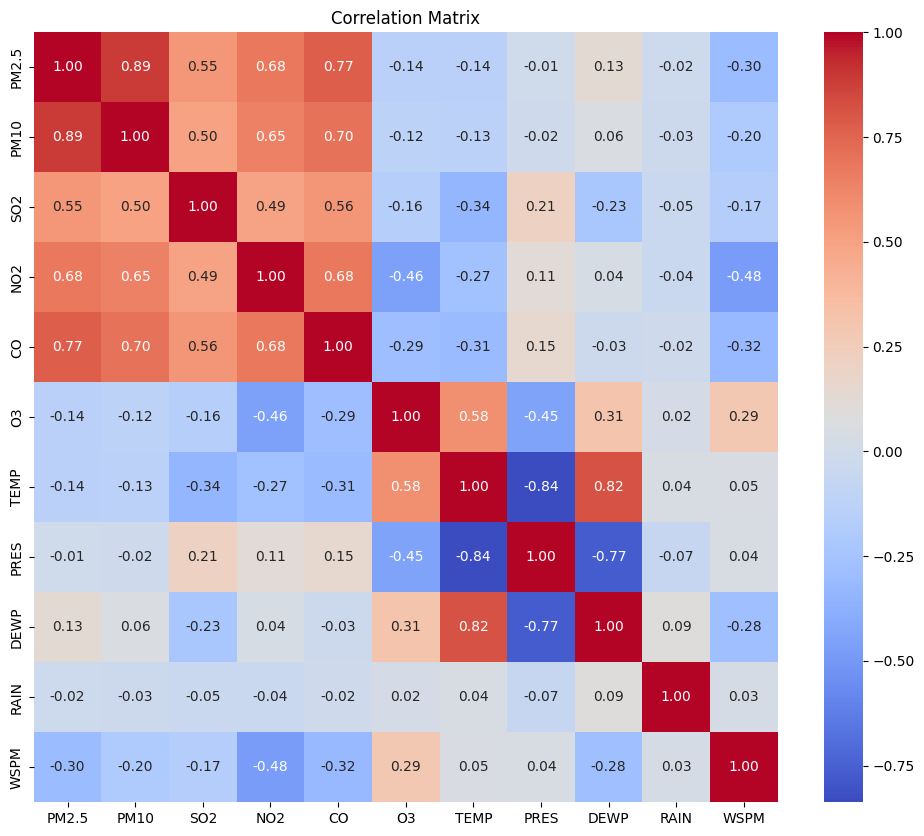

In [32]:
# Correlation Analysis
correlation_matrix = dongsi_df[cols_to_interpolate].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Explore huairou_df

In [33]:
huairou_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27719,27720,2016,4,28,23,31.0,71.0,7.0,32.0,400.0,81.0,14.2,1004.8,4.5,0.0,WNW,1.8,Huairou
5050,5051,2013,9,27,10,88.0,131.0,24.0,63.0,1400.0,36.0,20.4,1003.5,7.7,0.0,ESE,0.8,Huairou
32834,32835,2016,11,28,2,13.0,13.0,2.0,9.0,600.0,31.0,-4.4,1024.1,-11.0,0.0,NNE,1.1,Huairou
2233,2234,2013,6,2,1,31.0,67.0,9.0,25.0,700.0,68.0,18.6,999.2,6.4,0.0,WNW,2.3,Huairou
8916,8917,2014,3,7,12,8.0,16.0,7.0,9.0,300.0,81.0,6.3,1020.1,-22.1,0.0,ENE,1.5,Huairou


In [34]:
huairou_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,NaN,Huairou
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4943,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173,12.430556,1007.612315,2.218761,0.067950,NaN,1.652772,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,70.990900,84.792119,19.361831,26.269586,890.539429,55.620236,11.754318,10.025291,14.059918,0.848524,NaN,1.200181,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,29.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.400000,-9.700000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,50.000000,13.500000,1007.300000,2.700000,0.000000,NaN,1.300000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,84.000000,22.300000,1015.500000,15.300000,0.000000,NaN,2.000000,NaN


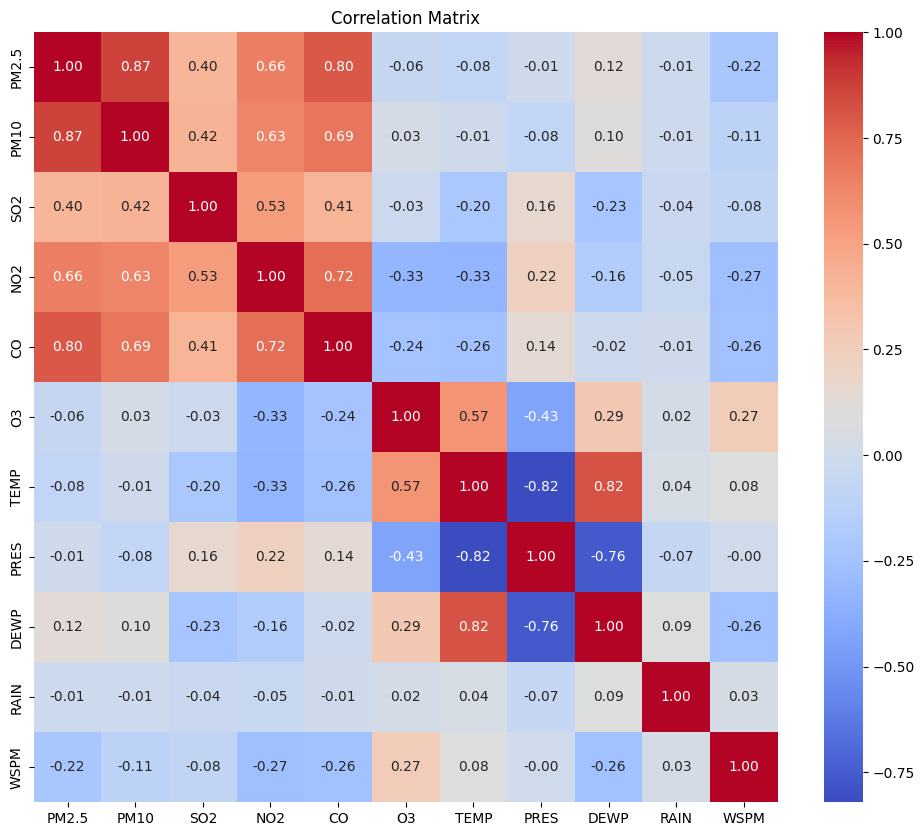

In [35]:
# Correlation Analysis
correlation_matrix = huairou_df[cols_to_interpolate].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana perbandingan rata-rata AQI perbulan berdasarkan polutan PM2.5 pada Station Changping, Dongsi, dan Huairou?

In [36]:
all_datasets = pd.concat([changping_df, dongsi_df, huairou_df], ignore_index=True)
all_datasets['date'] = pd.to_datetime(all_datasets[['year', 'month', 'day']])
average_aqi_per_day = all_datasets.groupby(['date', 'station'])['PM2.5'].mean().reset_index().round(3)

In [37]:
def calculate_aqi(C_p, breakpoints):
    I_low, I_high, C_low, C_high = breakpoints['I_low'], breakpoints['I_high'], breakpoints['C_low'], breakpoints['C_high']
    
    if C_p > C_high:
        return I_high
    
    return ((I_high - I_low) / (C_high - C_low)) * (C_p - C_low) + I_low

# Seven sets of hypothetical PM2.5 breakpoints
pm25_breakpoints_1 = {'I_low': 0, 'I_high': 50, 'C_low': 0, 'C_high': 12}
pm25_breakpoints_2 = {'I_low': 51, 'I_high': 100, 'C_low': 12.1, 'C_high': 35.4}
pm25_breakpoints_3 = {'I_low': 101, 'I_high': 150, 'C_low': 35.5, 'C_high': 55.4}
pm25_breakpoints_4 = {'I_low': 151, 'I_high': 200, 'C_low': 55.5, 'C_high': 150.4}
pm25_breakpoints_5 = {'I_low': 201, 'I_high': 300, 'C_low': 150.5, 'C_high': 250.4}
pm25_breakpoints_6 = {'I_low': 301, 'I_high': 400, 'C_low': 250.5, 'C_high': 350.4}
pm25_breakpoints_7 = {'I_low': 401, 'I_high': 500, 'C_low': 350.5, 'C_high': 500}

# Function to determine the correct set of breakpoints based on concentration
def choose_breakpoints(C_p):
    if C_p <= pm25_breakpoints_1['C_high']:
        return pm25_breakpoints_1
    elif C_p <= pm25_breakpoints_2['C_high']:
        return pm25_breakpoints_2
    elif C_p <= pm25_breakpoints_3['C_high']:
        return pm25_breakpoints_3
    elif C_p <= pm25_breakpoints_4['C_high']:
        return pm25_breakpoints_4
    elif C_p <= pm25_breakpoints_5['C_high']:
        return pm25_breakpoints_5
    elif C_p <= pm25_breakpoints_6['C_high']:
        return pm25_breakpoints_6
    else:
        return pm25_breakpoints_7

def categorize_aqi(AQI):
    if 0 <= AQI <= 50:
        return 'Good'
    elif 50 <= AQI <= 100:
        return 'Moderate'
    elif 101 <= AQI <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= AQI <= 200:
        return 'Unhealthy'
    elif 201 <= AQI <= 300:
        return 'Very Unhealthy'
    elif 301 <= AQI <= 400:
        return 'Hazardous'
    else:
        return 'Hazardous'

# Calculate AQI for each row using the correct set of breakpoints
average_aqi_per_day['AQI'] = average_aqi_per_day.apply(lambda row: calculate_aqi(row['PM2.5'], choose_breakpoints(row['PM2.5'])), axis=1).round()
average_aqi_per_day['Category'] = average_aqi_per_day['AQI'].apply(categorize_aqi)

In [38]:
average_aqi_per_day.head(5)

,date,station,PM2.5,AQI,Category
0,2013-03-01,Changping,5.083,21.0,Good
1,2013-03-01,Dongsi,6.417,27.0,Good
2,2013-03-01,Huairou,7.542,31.0,Good
3,2013-03-02,Changping,33.333,96.0,Moderate
4,2013-03-02,Dongsi,30.500,90.0,Moderate


In [39]:
average_aqi_per_day['date'] = average_aqi_per_day['date'].dt.to_period('M')
average_aqi_per_month = average_aqi_per_day.groupby(['date', 'station']).agg({'AQI': 'mean'}).reset_index().round()
average_aqi_per_month['Category'] = average_aqi_per_month['AQI'].apply(categorize_aqi)

In [40]:
average_aqi_per_month.sample(5)

,date,station,AQI,Category
112,2016-04,Dongsi,144.0,Unhealthy for Sensitive Groups
138,2017-01,Changping,155.0,Unhealthy
115,2016-05,Dongsi,139.0,Unhealthy for Sensitive Groups
26,2013-11,Huairou,120.0,Unhealthy for Sensitive Groups
44,2014-05,Huairou,123.0,Unhealthy for Sensitive Groups


In [41]:
average_aqi_per_month['date'] = average_aqi_per_month['date'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')

In [42]:
average_aqi_per_month.head(5)

,date,station,AQI,Category
0,2013-03-01,Changping,161.0,Unhealthy
1,2013-03-01,Dongsi,172.0,Unhealthy
2,2013-03-01,Huairou,158.0,Unhealthy
3,2013-04-01,Changping,126.0,Unhealthy for Sensitive Groups
4,2013-04-01,Dongsi,134.0,Unhealthy for Sensitive Groups


In [43]:
average_aqi_per_month.sort_values(by='AQI', ascending=False).head(10)

,date,station,AQI,Category
100,2015-12-01,Dongsi,214.0,Very Unhealthy
34,2014-02-01,Dongsi,213.0,Very Unhealthy
136,2016-12-01,Dongsi,211.0,Very Unhealthy
35,2014-02-01,Huairou,210.0,Very Unhealthy
33,2014-02-01,Changping,204.0,Very Unhealthy
97,2015-11-01,Dongsi,190.0,Unhealthy
139,2017-01-01,Dongsi,189.0,Unhealthy
101,2015-12-01,Huairou,186.0,Unhealthy
57,2014-10-01,Changping,181.0,Unhealthy
99,2015-12-01,Changping,181.0,Unhealthy


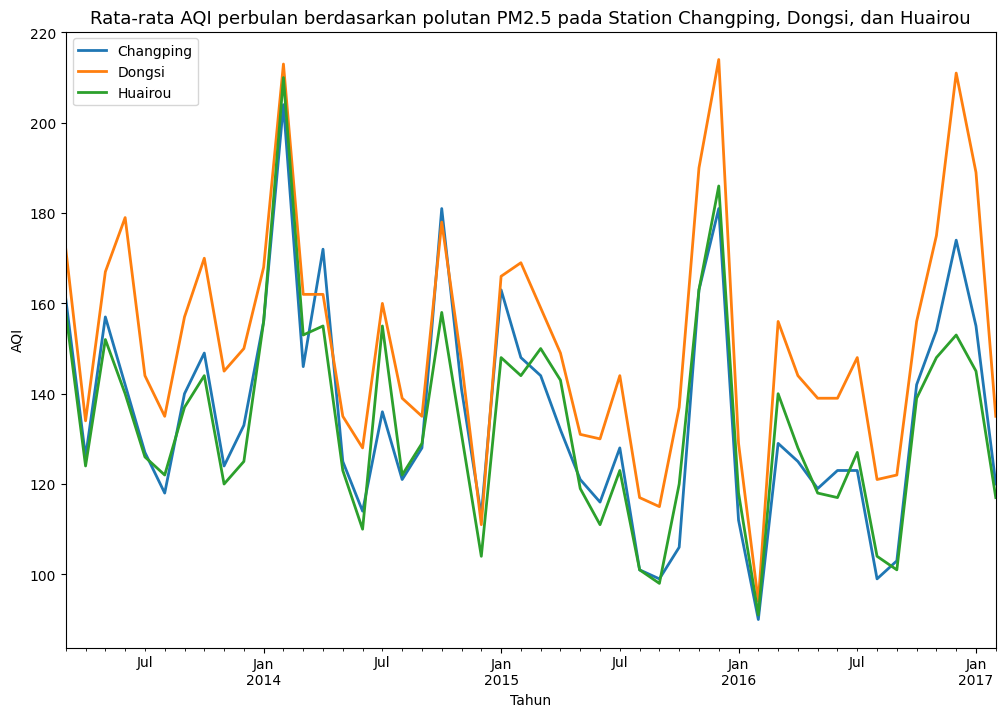

In [44]:
# Memfilter data untuk setiap stasiun
average_aqi_per_month['date'] = pd.to_datetime(average_aqi_per_month['date'])

# Pivot the data for easier plotting
pivot1_df = average_aqi_per_month.pivot(index='date', columns='station', values='AQI')

# Membuat line chart
pivot1_df.plot(figsize=(12, 8), linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata AQI perbulan berdasarkan polutan PM2.5 pada Station Changping, Dongsi, dan Huairou', fontsize=13)
plt.xlabel('Tahun')
plt.ylabel('AQI')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

#### Apakah terdapat perbedaan konsentrasi NO2 antara stasiun pengukuran di wilayah urban (Dongsi) dan pedesaan (Huairou)?

In [45]:
dongsi = average_aqi_per_month[average_aqi_per_month['station'] == 'Dongsi']
avg_aqi_dongsi = dongsi['AQI'].mean()
print(f'Average AQI for Dongsi: {round(avg_aqi_dongsi, 3)}')

Average AQI for Dongsi: 151.458


In [46]:
huairou = average_aqi_per_month[average_aqi_per_month['station'] == 'Huairou']
avg_aqi_huairou = huairou['AQI'].mean()
print(f'Average AQI for Huairou: {round(avg_aqi_huairou, 3)}')

Average AQI for Huairou: 133.458


In [47]:
# Menampilkan statistik deskriptif konsentrasi NO2 untuk masing-masing stasiun
print(f"Statistik Konsentrasi NO2 di Dongsi:\n{dongsi_df['NO2'].describe().round()}\n")
print(f"Statistik Konsentrasi NO2 di Huairou:\n{huairou_df['NO2'].describe().round()}\n")

Statistik Konsentrasi NO2 di Dongsi:
count    35064.0
mean        54.0
std         34.0
min          2.0
25%         27.0
50%         47.0
75%         74.0
max        258.0
Name: NO2, dtype: float64

Statistik Konsentrasi NO2 di Huairou:
count    35064.0
mean        32.0
std         26.0
min          1.0
25%         12.0
50%         25.0
75%         46.0
max        231.0
Name: NO2, dtype: float64



In [48]:
merged_df = pd.concat([dongsi_df, huairou_df], ignore_index=True)
merged_df['date'] = pd.to_datetime(merged_df[['year', 'month', 'day']])
average_NO2_per_day = merged_df.groupby(['date', 'station'])['NO2'].mean().reset_index().round(3)

In [49]:
average_NO2_per_day.sort_values(by="NO2", ascending=False)

,date,station,NO2
12,2013-03-07,Dongsi,174.000
10,2013-03-06,Dongsi,161.500
2782,2016-12-21,Dongsi,157.167
14,2013-03-08,Dongsi,151.764
1920,2015-10-17,Dongsi,149.042
...,...,...,...
543,2013-11-27,Huairou,2.771
1341,2014-12-31,Huairou,2.542
1311,2014-12-16,Huairou,2.458
1945,2015-10-29,Huairou,2.417


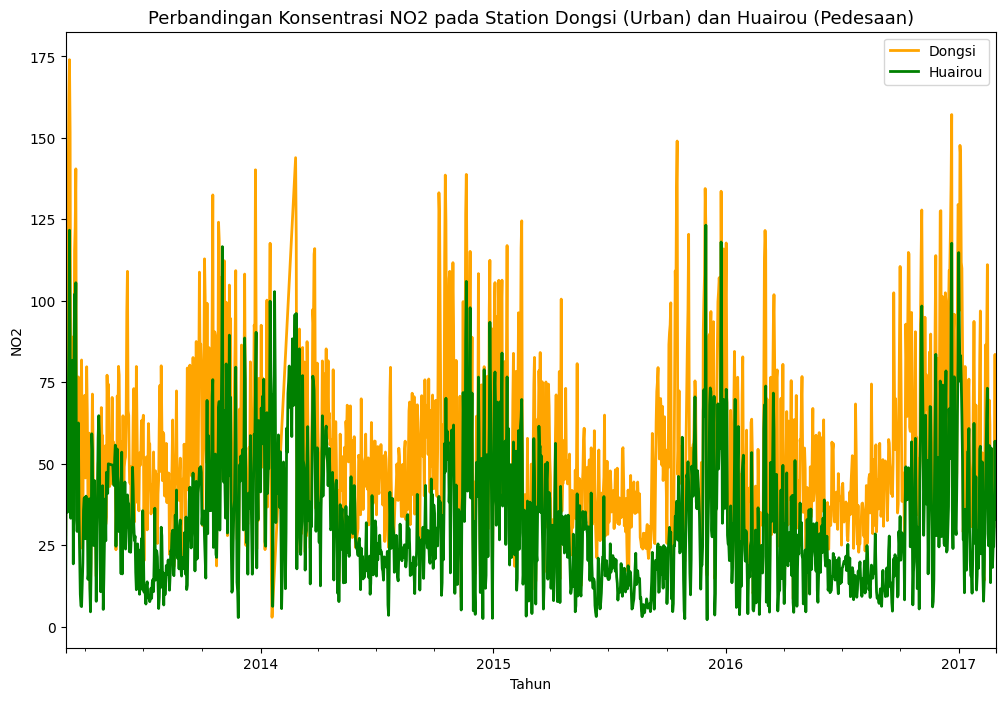

In [50]:
pivot1_df = average_NO2_per_day.pivot(index='date', columns='station', values='NO2')

# Membuat line chart
pivot1_df.plot(figsize=(12, 8), linewidth=2, color=['orange', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Konsentrasi NO2 pada Station Dongsi (Urban) dan Huairou (Pedesaan)', fontsize=13)
plt.xlabel('Tahun')
plt.ylabel('NO2')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

In [51]:
average_NO2_per_day['date'] = average_NO2_per_day['date'].dt.to_period('M')
average_NO2_per_month = average_NO2_per_day.groupby(['date', 'station']).agg({'NO2': 'mean'}).reset_index().round(3)

In [52]:
average_NO2_per_month['date'] = average_NO2_per_month['date'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')

In [53]:
average_NO2_per_month.sort_values(by='NO2', ascending=False)

,date,station,NO2
22,2014-02-01,Dongsi,94.361
90,2016-12-01,Dongsi,81.567
38,2014-10-01,Dongsi,77.939
0,2013-03-01,Dongsi,76.901
66,2015-12-01,Dongsi,72.758
...,...,...,...
61,2015-09-01,Huairou,15.096
9,2013-07-01,Huairou,14.910
85,2016-09-01,Huairou,14.844
83,2016-08-01,Huairou,14.466


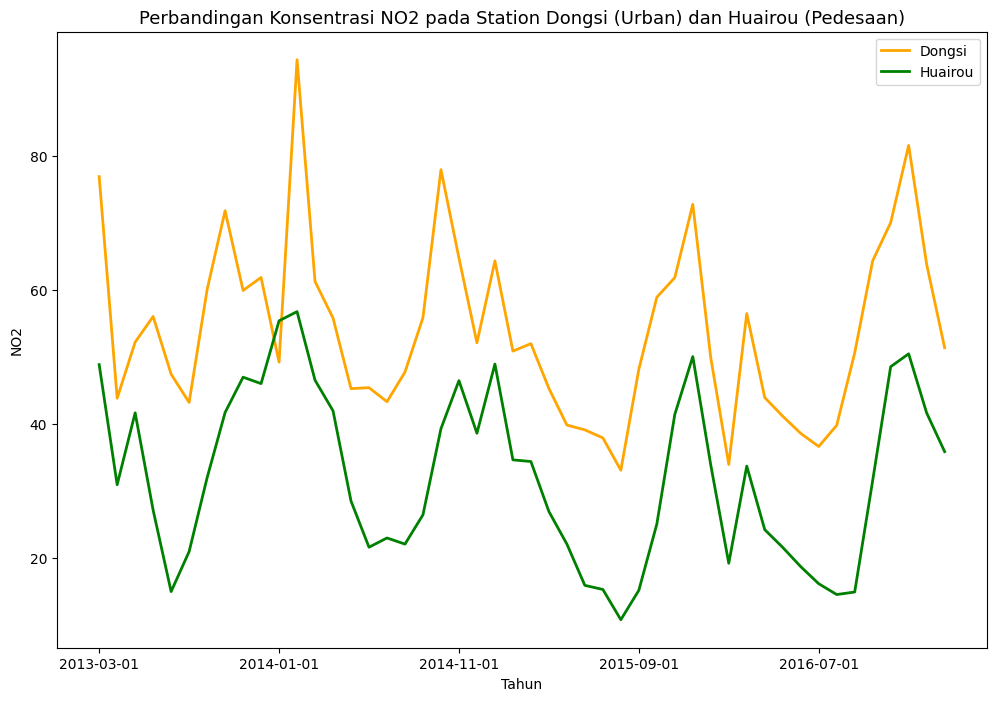

In [54]:
pivot2_df = average_NO2_per_month.pivot(index='date', columns='station', values='NO2')

# Membuat line chart
pivot2_df.plot(figsize=(12, 8), linewidth=2, color=['orange', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Konsentrasi NO2 pada Station Dongsi (Urban) dan Huairou (Pedesaan)', fontsize=13)
plt.xlabel('Tahun')
plt.ylabel('NO2')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

#### Apakah konsentrasi Karbon Monoksida (CO) cenderung lebih rendah selama periode hujan di Dongsi?

In [55]:
# Temporal Analysis
dongsi_df['datetime'] = pd.to_datetime(dongsi_df[['year', 'month', 'day']])
dongsi_df.set_index('datetime', inplace=True)

# Statistical Analysis
rainy_days = dongsi_df[dongsi_df['RAIN'] > 0]
dry_days = dongsi_df[dongsi_df['RAIN'] == 0]

# Compare CO concentrations on rainy and dry days
mean_CO_rainy = rainy_days[['CO']].mean()
mean_CO_dry = dry_days[['CO']].mean()

print(rainy_days[['hour', 'CO', 'RAIN']].head())
print('\n', dry_days[['hour', 'CO', 'RAIN']].head())

print("\nMean CO concentrations on Rainy Days:")
print(mean_CO_rainy)

print("\nMean CO concentrations on Dry Days:")
print(mean_CO_dry)

            hour      CO  RAIN
datetime                      
2013-03-12     4  1100.0   0.5
2013-03-12     5  1700.0   0.3
2013-03-12     6  2000.0   1.0
2013-03-12     7  1399.0   2.6
2013-03-12     8  1300.0   0.3

             hour     CO  RAIN
datetime                     
2013-03-01     0  300.0   0.0
2013-03-01     1  300.0   0.0
2013-03-01     2  300.0   0.0
2013-03-01     3  250.0   0.0
2013-03-01     4  200.0   0.0

Mean CO concentrations on Rainy Days:
CO    1199.105582
dtype: float64

Mean CO concentrations on Dry Days:
CO    1337.317106
dtype: float64


In [56]:
dongsi_df['date'] = pd.to_datetime(dongsi_df[['year', 'month', 'day', 'hour']])

# Group by month and calculate the average for CO and RAIN
monthly_averages = dongsi_df.groupby(dongsi_df['date'].dt.to_period("M")).agg({
    'CO': 'mean',
    'RAIN': 'mean'
}).reset_index()

monthly_averages.head(10)

,date,CO,RAIN
0,2013-03,1553.000672,0.020968
1,2013-04,958.869444,0.012222
2,2013-05,1167.440188,0.003360
3,2013-06,1182.762006,0.097917
4,2013-07,955.368906,0.263978
5,2013-08,1061.325120,0.072581
6,2013-09,1394.091667,0.076667
7,2013-10,1359.005376,0.030645
8,2013-11,2122.155140,0.000000
9,2013-12,1505.105240,0.000000


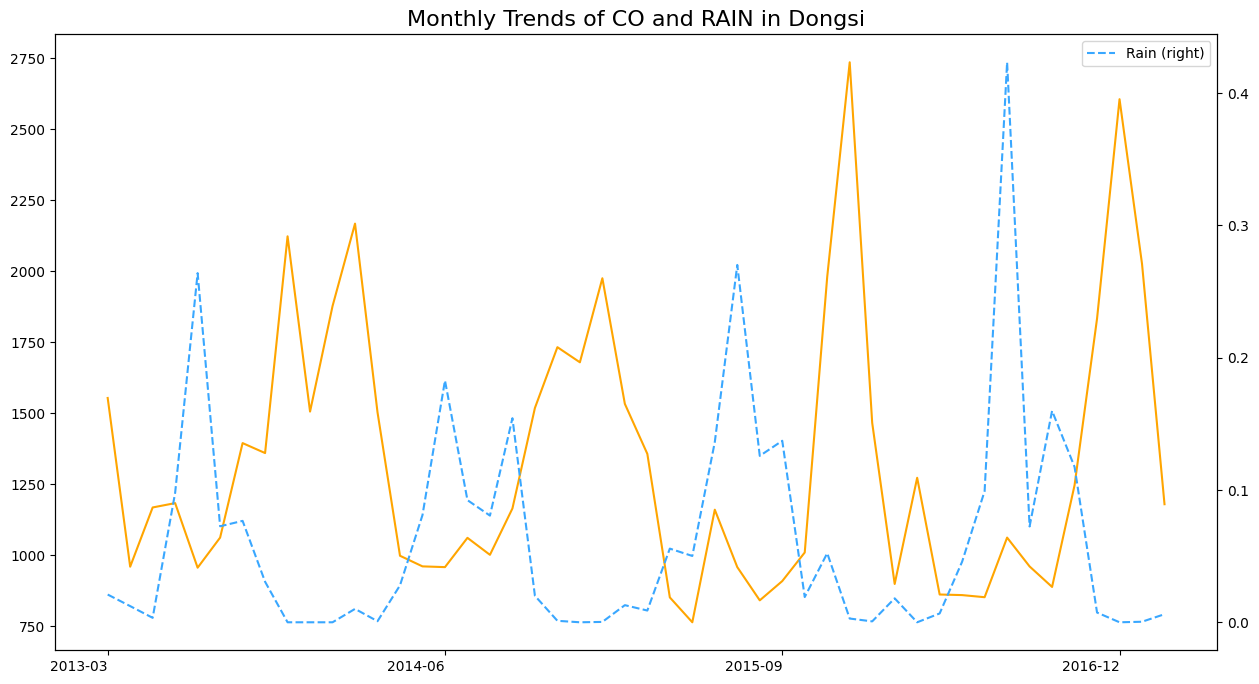

In [57]:
# Plotting using Pandas
plt.figure(figsize=(15, 8))
ax = monthly_averages['CO'].plot(label='CO', color='orange')
monthly_averages['RAIN'].plot(ax=ax, label='Rain', secondary_y=True, linestyle='--', color='#39A7FF')

ax.set_xticks(monthly_averages.index)
ax.set_xticklabels(monthly_averages['date'].dt.strftime('%Y-%m'), ha='right')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.title('Monthly Trends of CO and RAIN in Dongsi', fontsize=16)
plt.legend()
plt.show()

## Conclusion

- *Air Quality Index* (AQI) berdasarkan polutan *Particulate Matter* (PM2.5) pada Station Changping, Dongsi, dan Huairou cenderung fluktuatif dan pergerakannya sama. Dongsi yang merupakan daerah urban memiliki rata-rata AQI perbulan terbesar dibandingkan dengan 2 station lainnya dan Huairou yang merupakan daerah pedesaan memiliki rata-rata paling rendah. Peningkatan terbesar pada ketiga station tersebut terjadi pada Februari 2014 yang mana ketiganya mencapai kategori 'Very Unhealthy'. Peningkatan AQI terjadi pada musim panas dan gugur (Juni - November). Kategori "Unhealthy for Sensitive Groups" mendominasi, menunjukkan risiko kesehatan yang lebih tinggi, terutama bagi kelompok sensitif, yaitu orang dengan penyakit jantung atau paru-paru, orang dewasa yang lebih tua, anak-anak, dan orang-orang dengan status sosial ekonomi yang lebih rendah.

- Nitrtogen Dioksida atau NO2 merupakan salah satu dari beberapa oksida nitrogen yang dihasilkan sebagai hasil dari reaksi pembakaran bahan bakar fosil dan aktivitas industri. Dari hasil analisis didapatkan secara umum, Dongsi (wilayah urban) memiliki konsentrasi NO2 yang lebih tinggi dibandingkan dengan Huairou (wilayah pedesaan) selama periode pengukuran. Periode tertinggi bagi kedua wilayah terjadi pada Februari 2014. Meskipun terdapat fluktuasi bulanan, perbedaan rata-rata konsentrasi NO2 antara kedua stasiun pengukuran menunjukkan adanya pengaruh urbanisasi terhadap kualitas udara, dengan wilayah urban cenderung memiliki konsentrasi NO2 yang lebih tinggi dibandingkan wilayah pedesaan. Namun, rata-rata konsentrasi NO2 bulanan pada kedua station masih tergolong pada kategori 'Moderate' untuk yang tertinggu. Meskipun begitu, pada periode harian masih ada yang konsentrasinya menyentuk angka diatas 200 sehingga masuk dalam kategori 'Very Unhealthy'. 

- Karbon Monoksida (CO) merupakan salah satu gas hasil pembakaran bahan bakar fosil yang tidak berwarna, tidak berbau, namun sangat berbahaya. Pada rata-rata harian pada Distrik Dongsi, konsentrasi CO cenderung lebih rendah saat hujan karena  tetesan air hujan yang jatuh dapat menangkap dan menghilangkan partikel dan gas, termasuk CO, dari atmosfer. Walaupun memang tidak begitu signifikan, tapi tetap menjadi salah satu faktor penting pengurangan polutan. Rata-rata bulanan RAIN memang terbilang kecil karna memang tidak banyak terdapat hari yang hujan, tapi ada beberapa hari yang memiliki RAIN yang mencapai nilai 46 yang mana ini merupakan angka yang tinggi untuk curah hujan.

--- 

Langkah Strategis
- Polutan tersebut bisa muncul dan tinggi konsentrasinya karena pembakaran bahan bakar fosil dari kendaraan bermotor, industri, dan pembangkit listrik. Perlu dibuat regulasi yang lebih ketat untuk mengontrol emisi industri yang dihasilkan terutama di daerah perkotaan dan mendorong penggunaan teknologi bersih berkelanjutan.
- Pemaksimalan transportasi publik dan menghimbau masyarakat agar mengurangi penggunaan kendaraan pribadi.
- Menerapkan pembangunan berkelanjutan dengan mengedepankan penggunaan prinsip yang ramah lingkungan. Seperti penggununaan energi terbarukan, bangunan hijau, manajemen air dan pengelolaan limbah, dan penghijauan ruang publik.  

